In [163]:
from transformers import AutoModelForSequenceClassification
from transformers import TFAutoModelForSequenceClassification
from transformers import AutoTokenizer
import numpy as np
import pandas as pd
from scipy.special import softmax
import csv
import urllib.request
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from matplotlib import pyplot as plt
from sklearn import tree

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from imblearn import under_sampling, over_sampling
from imblearn.under_sampling import RandomUnderSampler
from imblearn.under_sampling import NearMiss
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, zero_one_loss

In [133]:
tweets_final = pd.read_csv('./tweets_final.csv')

In [134]:
#import data
data_filename = "./us-house/us-house/data/us-house.csv"
us_house = pd.read_csv(data_filename, error_bad_lines=False)

b'Skipping line 368: expected 53 fields, saw 54\n'


In [135]:
us_house

,state_name,state_name_slug,state_code,state_code_slug,district,at_large,vacant,bioguide,thomas,opensecrets,...,address_city,address_state,address_zipcode,address_type,website,contact_page,facebook_url,twitter_handle,twitter_url,photo_url
0,Alaska,alaska,AK,ak,NaN,True,False,Y000033,1256.0,N00007999,...,Washington,DC,20515,NaN,https://donyoung.house.gov,http://donyoung.house.gov/contact/,https://facebook.com/RepDonYoung,repdonyoung,https://twitter.com/repdonyoung,https://cdn.civil.services/us-house/headshots/...
1,Alabama,alabama,AL,al,1.0,False,False,B001289,2197.0,N00035380,...,Washington,DC,20515,NaN,https://byrne.house.gov,https://byrne.house.gov/contact/email-me,https://facebook.com/RepByrne,RepByrne,https://twitter.com/RepByrne,https://cdn.civil.services/us-house/headshots/...
2,Alabama,alabama,AL,al,2.0,False,False,R000591,1986.0,N00030768,...,Washington,DC,20515,NaN,https://roby.house.gov,https://roby.house.gov/contact-me,https://facebook.com/Representative.Martha.Roby,RepMarthaRoby,https://twitter.com/RepMarthaRoby,https://cdn.civil.services/us-house/headshots/...
3,Alabama,alabama,AL,al,3.0,False,False,R000575,1704.0,N00024759,...,Washington,DC,20515,NaN,https://mikerogers.house.gov,https://mikerogers.house.gov/contact-mike/emai...,https://facebook.com/MikeRogersforCongress,RepMikeRogersAL,https://twitter.com/RepMikeRogersAL,https://cdn.civil.services/us-house/headshots/...
4,Alabama,alabama,AL,al,4.0,False,False,A000055,1460.0,N00003028,...,Washington,DC,20515,NaN,https://aderholt.house.gov,https://aderholt.house.gov/contact-robert,https://facebook.com/RobertAderholt,Robert_Aderholt,https://twitter.com/Robert_Aderholt,https://cdn.civil.services/us-house/headshots/...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
429,Wisconsin,wisconsin,WI,wi,8.0,False,False,G000579,NaN,N00039330,...,Washington,DC,20515,NaN,https://gallagher.house.gov,https://gallagher.house.gov/contact/email,https://facebook.com/mikeforwisconsin,MikeforWI,https://twitter.com/MikeforWI,https://cdn.civil.services/us-house/headshots/...
430,West Virginia,west-virginia,WV,wv,1.0,False,False,M001180,2074.0,N00031681,...,Washington,DC,20515,NaN,https://mckinley.house.gov,https://mckinley.house.gov/email-me/,https://facebook.com/RepMcKinley,RepMcKinley,https://twitter.com/RepMcKinley,https://cdn.civil.services/us-house/headshots/...
431,West Virginia,west-virginia,WV,wv,2.0,False,False,M001195,2277.0,N00033814,...,Washington,DC,20515,NaN,https://mooney.house.gov,https://mooney.house.gov/contact/email,https://facebook.com/CongressmanAlexMooney,RepAlexMooney,https://twitter.com/RepAlexMooney,https://cdn.civil.services/us-house/headshots/...
432,West Virginia,west-virginia,WV,wv,3.0,False,False,M001205,NaN,N00041542,...,Washington,DC,20515,NaN,https://miller.house.gov/,https://miller.house.gov/contact,https://facebook.com/HouseRepublicans,housegop,https://twitter.com/housegop,https://cdn.civil.services/us-house/headshots/...


In [136]:
us_house['positive'] = 0
us_house['negative'] = 0
us_house['negative'] = 0
us_house['target'] = 1
us_house.fillna(0)

,state_name,state_name_slug,state_code,state_code_slug,district,at_large,vacant,bioguide,thomas,opensecrets,...,address_type,website,contact_page,facebook_url,twitter_handle,twitter_url,photo_url,positive,negative,target
0,Alaska,alaska,AK,ak,0.0,True,False,Y000033,1256.0,N00007999,...,0.0,https://donyoung.house.gov,http://donyoung.house.gov/contact/,https://facebook.com/RepDonYoung,repdonyoung,https://twitter.com/repdonyoung,https://cdn.civil.services/us-house/headshots/...,0,0,1
1,Alabama,alabama,AL,al,1.0,False,False,B001289,2197.0,N00035380,...,0.0,https://byrne.house.gov,https://byrne.house.gov/contact/email-me,https://facebook.com/RepByrne,RepByrne,https://twitter.com/RepByrne,https://cdn.civil.services/us-house/headshots/...,0,0,1
2,Alabama,alabama,AL,al,2.0,False,False,R000591,1986.0,N00030768,...,0.0,https://roby.house.gov,https://roby.house.gov/contact-me,https://facebook.com/Representative.Martha.Roby,RepMarthaRoby,https://twitter.com/RepMarthaRoby,https://cdn.civil.services/us-house/headshots/...,0,0,1
3,Alabama,alabama,AL,al,3.0,False,False,R000575,1704.0,N00024759,...,0.0,https://mikerogers.house.gov,https://mikerogers.house.gov/contact-mike/emai...,https://facebook.com/MikeRogersforCongress,RepMikeRogersAL,https://twitter.com/RepMikeRogersAL,https://cdn.civil.services/us-house/headshots/...,0,0,1
4,Alabama,alabama,AL,al,4.0,False,False,A000055,1460.0,N00003028,...,0.0,https://aderholt.house.gov,https://aderholt.house.gov/contact-robert,https://facebook.com/RobertAderholt,Robert_Aderholt,https://twitter.com/Robert_Aderholt,https://cdn.civil.services/us-house/headshots/...,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
429,Wisconsin,wisconsin,WI,wi,8.0,False,False,G000579,0.0,N00039330,...,0.0,https://gallagher.house.gov,https://gallagher.house.gov/contact/email,https://facebook.com/mikeforwisconsin,MikeforWI,https://twitter.com/MikeforWI,https://cdn.civil.services/us-house/headshots/...,0,0,1
430,West Virginia,west-virginia,WV,wv,1.0,False,False,M001180,2074.0,N00031681,...,0.0,https://mckinley.house.gov,https://mckinley.house.gov/email-me/,https://facebook.com/RepMcKinley,RepMcKinley,https://twitter.com/RepMcKinley,https://cdn.civil.services/us-house/headshots/...,0,0,1
431,West Virginia,west-virginia,WV,wv,2.0,False,False,M001195,2277.0,N00033814,...,0.0,https://mooney.house.gov,https://mooney.house.gov/contact/email,https://facebook.com/CongressmanAlexMooney,RepAlexMooney,https://twitter.com/RepAlexMooney,https://cdn.civil.services/us-house/headshots/...,0,0,1
432,West Virginia,west-virginia,WV,wv,3.0,False,False,M001205,0.0,N00041542,...,0.0,https://miller.house.gov/,https://miller.house.gov/contact,https://facebook.com/HouseRepublicans,housegop,https://twitter.com/housegop,https://cdn.civil.services/us-house/headshots/...,0,0,1


In [137]:
tweets_final['user']=tweets_final['user'].str.lower() 
us_house['twitter_handle'] = us_house['twitter_handle'].str.lower()

In [138]:
us_house.loc[us_house['twitter_handle'] == 'repharley' , 'target'] = 0
us_house.loc[us_house['twitter_handle'] == 'tjcoxcongress' , 'target'] = 0
us_house.loc[us_house['twitter_handle'] == 'repgilcisneros' , 'target'] = 0
us_house.loc[us_house['twitter_handle'] == 'repdmp' , 'target'] = 0
us_house.loc[us_house['twitter_handle'] == 'repshalala' , 'target'] = 0
us_house.loc[us_house['twitter_handle'] == 'collinpeterson' , 'target'] = 0
us_house.loc[us_house['twitter_handle'] == 'repkendrahorn' , 'target'] = 0
us_house.loc[us_house['twitter_handle'] == 'xochforcongress' , 'target'] = 0
us_house.loc[us_house['twitter_handle'] == 'joecunninghamsc' , 'target'] = 0
us_house.loc[us_house['twitter_handle'] == 'repbenmcadams' , 'target'] = 0


In [139]:
us_house = us_house[us_house.twitter_handle != 'housegop']
us_house = us_house[us_house.twitter_handle != 'housedemocrats']
del us_house['facebook_url']
del us_house['address_type']
del us_house['opensecrets']
del us_house['twitter_url']
del us_house['photo_url']
del us_house['bioguide']
del us_house['website']
del us_house['contact_page']
del us_house['address_street']
del us_house['address_sec_unit_type']
del us_house['address_sec_unit_num']
del us_house['address_city']
del us_house['address_state']
del us_house['address_zipcode']
del us_house['address_prefix']
del us_house['address_complete']
del us_house['address_number']
del us_house['fec']
del us_house['phone']
del us_house['fax']
del us_house['biography']
del us_house['google_entity_id']
del us_house['name_suffix']
del us_house['goes_by']
del us_house['pronunciation']
del us_house['term_end']
del us_house['wikidata']

In [140]:
rep_twitter_accounts = us_house['twitter_handle'].tolist()

In [141]:
broken_accounts = []
for account in rep_twitter_accounts:
    temp = tweets_final.loc[tweets_final['user'] == account]
    positive = temp['positive'].mean()
    neutral = temp['neutral'].mean()
    negative = temp['negative'].mean()
    us_house.loc[us_house['twitter_handle'] == account , 'positive'] = positive
    us_house.loc[us_house['twitter_handle'] == account , 'neutral'] = neutral
    us_house.loc[us_house['twitter_handle'] == account , 'negative'] = negative


In [142]:
us_house

,state_name,state_name_slug,state_code,state_code_slug,district,at_large,vacant,thomas,votesmart,maplight,...,openly_lgbtq,date_of_birth,entered_office,latitude,longitude,twitter_handle,positive,negative,target,neutral
0,Alaska,alaska,AK,ak,NaN,True,False,1256.0,26717.0,525.0,...,no,1933-06-09,1973-01-03,38.886323,-77.011373,repdonyoung,0.660480,0.123560,1,0.215960
1,Alabama,alabama,AL,al,1.0,False,False,2197.0,27584.0,2054.0,...,no,1955-02-16,2014-01-08,38.886323,-77.011373,repbyrne,0.505578,0.139894,1,0.354528
2,Alabama,alabama,AL,al,2.0,False,False,1986.0,71604.0,1408.0,...,no,1976-07-27,2011-01-05,38.886323,-77.011373,repmartharoby,0.513789,0.053736,1,0.432474
3,Alabama,alabama,AL,al,3.0,False,False,1704.0,5705.0,433.0,...,no,1958-07-16,2003-01-07,38.886323,-77.011373,repmikerogersal,0.649507,0.096176,1,0.254316
4,Alabama,alabama,AL,al,4.0,False,False,1460.0,441.0,127.0,...,no,1965-07-22,1997-01-07,38.886323,-77.011373,robert_aderholt,0.593923,0.153287,1,0.252790
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
428,Wisconsin,wisconsin,WI,wi,7.0,False,True,2072.0,126238.0,1493.0,...,no,1971-10-03,2011-01-05,38.886323,-77.011373,repseanduffy,NaN,NaN,1,NaN
429,Wisconsin,wisconsin,WI,wi,8.0,False,False,NaN,171843.0,2243.0,...,no,1984-03-03,2017-01-03,38.886323,-77.011373,mikeforwi,0.457071,0.183298,1,0.359631
430,West Virginia,west-virginia,WV,wv,1.0,False,False,2074.0,117396.0,1492.0,...,no,1947-03-28,2011-01-05,38.886323,-77.011373,repmckinley,0.545675,0.110644,1,0.343681
431,West Virginia,west-virginia,WV,wv,2.0,False,False,2277.0,NaN,2118.0,...,no,1971-06-05,2015-01-06,38.886323,-77.011373,repalexmooney,0.655089,0.094051,1,0.250861


In [143]:
us_house = us_house.fillna(0)

In [144]:
del us_house['twitter_handle']
del us_house['entered_office']
del us_house['name']
del us_house['name_slug']
del us_house['first_name']
del us_house['middle_name']
del us_house['last_name']
del us_house['title']
del us_house['state_name']
del us_house['state_name_slug']
del us_house['state_code']
del us_house['date_of_birth']

In [145]:
us_house.dtypes

state_code_slug     object
district           float64
at_large              bool
vacant                bool
thomas             float64
votesmart          float64
maplight           float64
party               object
gender              object
ethnicity           object
religion            object
openly_lgbtq        object
latitude           float64
longitude          float64
positive           float64
negative           float64
target               int64
neutral            float64
dtype: object

In [146]:
us_house['state_code_slug'] = us_house['state_code_slug'].astype('category')
us_house['party'] = us_house['party'].astype('category')
us_house['gender'] = us_house['gender'].astype('category')
us_house['ethnicity'] = us_house['ethnicity'].astype('category')
us_house['religion'] = us_house['religion'].astype('category')
us_house['openly_lgbtq'] = us_house['openly_lgbtq'].astype('category')

In [148]:
us_house['state_code_cat'] = us_house['state_code_slug'].cat.codes
us_house['party_cat'] = us_house['party'].cat.codes
us_house['gender_cat'] = us_house['gender'].cat.codes
us_house['ethnicity_cat'] = us_house['ethnicity'].cat.codes
us_house['religion_cat'] = us_house['religion'].cat.codes
us_house['openly_lgbtq_cat'] = us_house['openly_lgbtq'].cat.codes
del us_house['state_code_slug']
del us_house['party']
del us_house['gender']
del us_house['ethnicity']
del us_house['religion']
del us_house['openly_lgbtq']

In [149]:
us_house.dtypes

district            float64
at_large               bool
vacant                 bool
thomas              float64
votesmart           float64
maplight            float64
latitude            float64
longitude           float64
positive            float64
negative            float64
target                int64
neutral             float64
state_code_cat         int8
party_cat              int8
gender_cat             int8
ethnicity_cat          int8
religion_cat           int8
openly_lgbtq_cat       int8
dtype: object

In [150]:
y = us_house.target
x = us_house.drop("target",axis = 1)

In [152]:
#rus = RandomUnderSampler(sampling_strategy='majority', random_state=42)

In [153]:
#X_under, y_under = rus.fit_resample(x, y)

In [154]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=4)

In [166]:
clf = DecisionTreeClassifier(criterion='gini', max_depth=8)
clf = clf.fit(x_train, y_train)

In [167]:
clf.predict(x_test,y_test.any())

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [168]:
clf.score(x_test, y_test)

0.9772727272727273

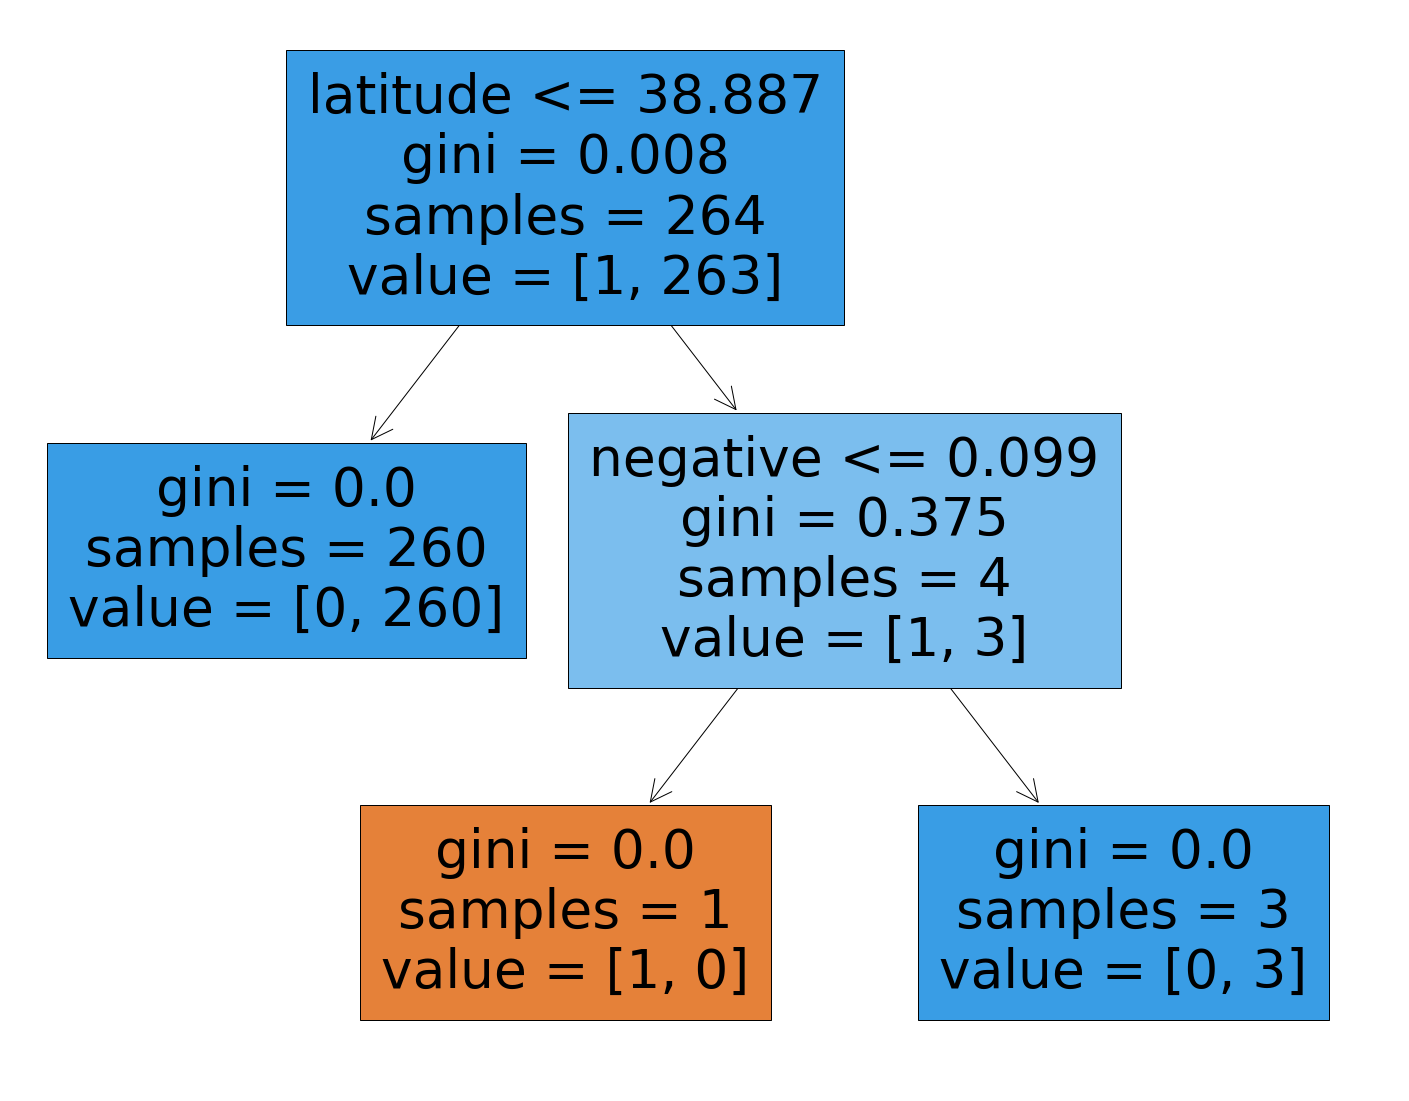

In [169]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf, 
                   feature_names=x.columns, 
                   filled=True)